# 09 Raster Operations in GemGIS

Several smaller raster operations needed for the functionality of GemGIS are implemented. This includes calculating the difference of arrays and rasterio objects (``calculate_difference``).

<img src="../images/tutorial09_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/09_raster_operations_gemgis/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="09_raster_operations_gemgis.zip", dirpath=file_path)

## Loading the raster data

The rasters to perform the raster operations are being loaded with rasterio and NumPy.

In [2]:
import rasterio 
import numpy as np

array = np.load(file_path + 'array.npy')

raster1 = rasterio.open(file_path + 'raster.tif')
raster2 = rasterio.open(file_path + 'raster.tif')


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Calculating Differences

### Plotting Raster Data

As the loaded rasters are identical, the same figures are plotted.

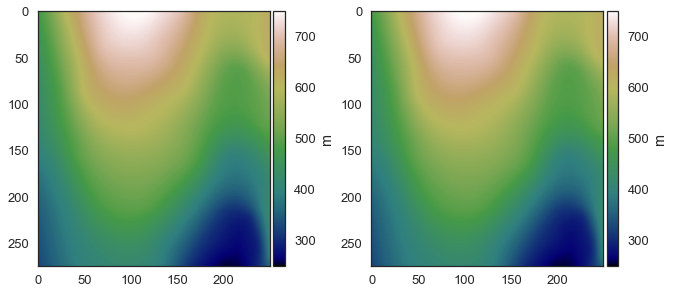

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.35)

im1 = ax1.imshow(raster1.read(1), cmap='gist_earth', vmin=250, vmax=750)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('m')


im2 = ax2.imshow(raster2.read(1), cmap='gist_earth', vmin=250, vmax=750)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im2, cax=cax)
cbar.set_label('m')

### Calculate difference between rasterio objects

The difference between two rasterio objects can easily be calculated using the function ``calculate_difference``. The result will be an array. In this case, the result is zero as the arrays are identical.

In [4]:
diff = gg.raster.calculate_difference(raster1=raster1, 
                                      raster2=raster2)
diff

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

### Calculate difference between arrays of the same size

The difference between two arrays with the same size can easily be calculated using the function ``calculate_difference``. The result will be an array. In this case, the result is not zero as 10 meters were subtracted from the second raster.

In [5]:
diff = gg.raster.calculate_difference(raster1=raster1.read(1), 
                                      raster2=raster2.read(1)-10)
diff

array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]], dtype=float32)

### Calculate difference of arrays of different size

The difference between two arrays that do not have the same size can easily be calculated using the function ``calculate_difference``. The result will be an array. In this case, the result is not zero.

Printing the shapes of the arrays.

In [6]:
print(array.shape)

(1069, 972)


In [7]:
print(raster1.shape)

(275, 250)


Plotting the arrays.

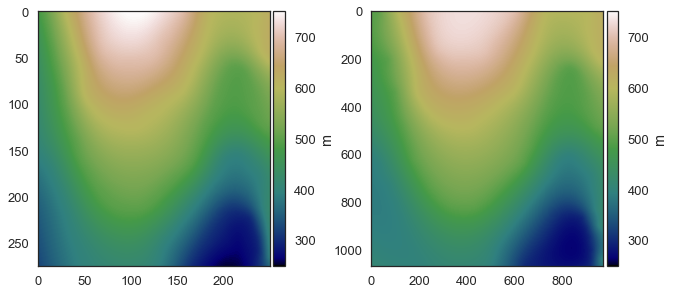

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.35)

im1 = ax1.imshow(raster1.read(1), cmap='gist_earth', vmin=250, vmax=750)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im1, cax=cax)
cbar.set_label('m')


im2 = ax2.imshow(np.flipud(array), cmap='gist_earth', vmin=250, vmax=750)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im2, cax=cax)
cbar.set_label('m')

Calculating the difference. The array is turned so that the right values are substracted from the original raster.

In [9]:
diff = gg.raster.calculate_difference(raster1=raster1.read(1),
                                      raster2=array,
                                      flip_array=True)

diff

array([[-16.41678396, -13.61172709, -10.87035877, ...,  -3.19775272,
         -3.22781911,  -3.10479498],
       [-16.47500144, -13.72951014, -11.06531114, ...,  -2.5296072 ,
         -2.54858561,  -2.41534018],
       [-16.65319032, -13.99706557, -11.45171536, ...,  -1.86637421,
         -1.8699199 ,  -1.72295418],
       ...,
       [-84.66600704, -82.48561266, -80.28644375, ..., -22.60844144,
        -22.88386594, -22.15305095],
       [-85.70802569, -83.51980015, -81.31276338, ..., -23.11606161,
        -23.39106379, -22.70976508],
       [-86.71828282, -84.52284361, -82.30832183, ..., -23.66986812,
        -23.95510436, -23.32702576]])

Plotting the difference. The difference is caused by a different interpolation algorithm that was used to create the array. 

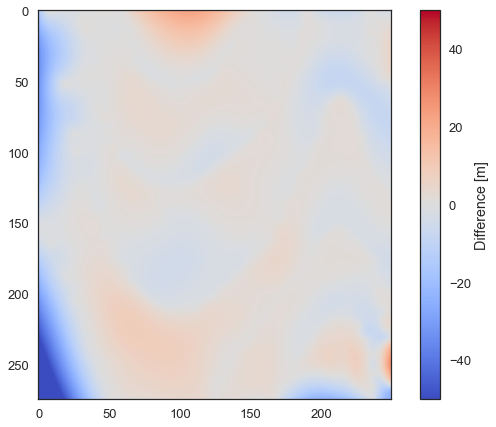

In [10]:
im = plt.imshow(diff, cmap='coolwarm', vmin=-50, vmax=50)
cbar = plt.colorbar(im)
cbar.set_label('Difference [m]')

## Resizing a raster by extent

We can easily resize an array by providing a width and height for the returning array.

In [11]:
array_resized = gg.raster.resize_raster(raster=raster1, 
                                        width=972,
                                        height=1069)
array_resized.shape

(1069, 972)

Plotting the new array.

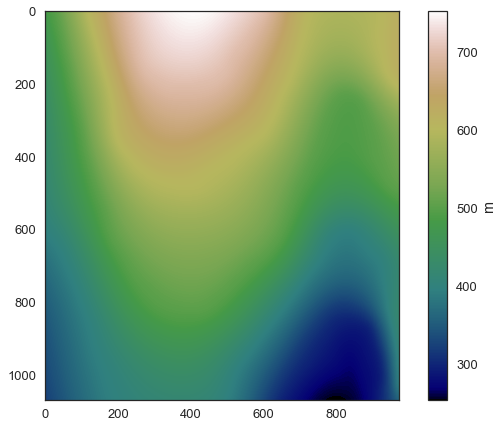

In [12]:
im = plt.imshow(array_resized, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

## Resize raster by array

A raster can also be resized to fit the size of another array.

Printing the shapes of the arrays.

In [13]:
print(raster1.shape)

(275, 250)


In [14]:
print(array.shape)

(1069, 972)


Resizing the raster to the size of the array.

In [15]:
array_resized = gg.raster.resize_by_array(raster=raster1,
                                          array=array)

print(array_resized.shape)

(1069, 972)


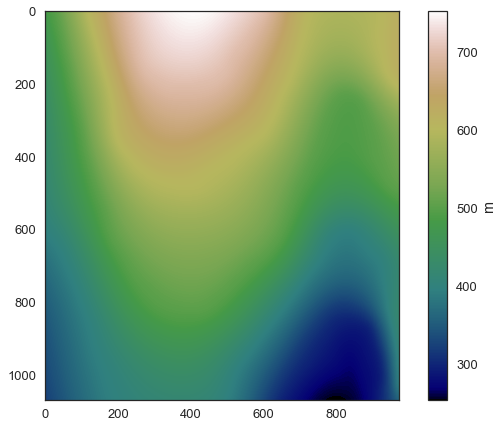

In [16]:
im = plt.imshow(array_resized, cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

## Saving array as tiff

Arrays can easily be saved as rasters using ``save_as_tiff``. 

In [17]:
gg.raster.save_as_tiff(raster=array,
                       path= file_path + 'output_raster.tif',
                       extent=[0,972,0,1069],
                       crs='EPSG:4326',
                       overwrite_file=True)

Raster successfully saved


## Merging rasters

Several different rasterio objects/raster files can be merged using the ``merge_tiles(..)`` function. Before that, a list of file paths and and a list of loaded rasterio objects needs to be created first.

### Creating List of Filepaths

A list of filepaths with all raster files can be created using ``create_filepaths(..)``.


In [18]:
paths = gg.raster.create_filepaths(dirpath=file_path, search_criteria = 'tile*')
paths

['../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_292000_294000_5626000_5628000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_292000_294000_5628000_5630000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_292000_294000_5630000_5632000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_294000_296000_5626000_5628000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_294000_296000_5628000_5630000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_294000_296000_5630000_5632000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_296000_298000_5626000_5628000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_296000_298000_5628000_5630000.tif',
 '../../../../gemgis_data/data/09_raster_operations_gemgis\\tile_296000_298000_5630000_5632000.tif']

### Creating List of Rasterio Objects

In [19]:
raster_objects = gg.raster.create_src_list(dirpath=file_path, search_criteria = 'tile*')
raster_objects

[<open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_292000_294000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_292000_294000_5628000_5630000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_292000_294000_5630000_5632000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_294000_296000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_294000_296000_5628000_5630000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_294000_296000_5630000_5632000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_296000_298000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data

In [20]:
raster_objects = gg.raster.create_src_list(filepaths=paths)
raster_objects

[<open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_292000_294000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_292000_294000_5628000_5630000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_292000_294000_5630000_5632000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_294000_296000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_294000_296000_5628000_5630000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_294000_296000_5630000_5632000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data/09_raster_operations_gemgis\tile_296000_298000_5626000_5628000.tif' mode='r'>,
 <open DatasetReader name='../../../../gemgis_data/data

### Merging Rasters

The loaded list of rasters can now be merged using ``merge_tiles(..)``. The result will the array that is created and the transform associated with the array.

In [21]:
mosaic, transform = gg.raster.merge_tiles(src_files=raster_objects)

In [22]:
type(mosaic)

numpy.ndarray

In [23]:
type(transform)

affine.Affine

In [24]:
mosaic

array([[200.72, 200.73, 200.72, ..., 204.42, 204.45, 204.45],
       [200.74, 200.74, 200.75, ..., 204.43, 204.44, 204.48],
       [200.76, 200.76, 200.76, ..., 204.42, 204.48, 204.5 ],
       ...,
       [329.15, 328.86, 328.74, ..., 242.45, 242.38, 242.28],
       [329.29, 329.06, 328.87, ..., 242.45, 242.39, 242.31],
       [329.47, 329.3 , 329.09, ..., 242.42, 242.37, 242.32]],
      dtype=float32)

In [25]:
transform

Affine(1.0, 0.0, 292000.0,
       0.0, -1.0, 5632000.0)

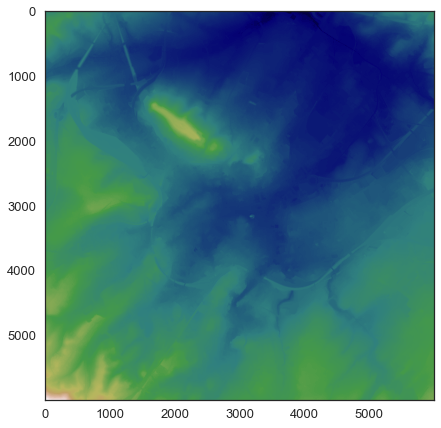

In [26]:
plt.imshow(mosaic, cmap='gist_earth')